# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [240]:
# 1. Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [241]:
# 2. Load Dataset
df = pd.read_csv('dataset_inisiasi.csv')

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [242]:
# 3. Data Splitting
# Memisahkan fitur dan target (asumsi target adalah 'cluster_label')
X = df.drop('cluster_label', axis=1)
y = df['cluster_label']

In [243]:
# Membagi data menjadi training set (70%) dan test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [244]:
from sklearn.preprocessing import LabelEncoder

# Identifikasi kolom kategorikal
cat_cols = X_train.select_dtypes(include=['object']).columns

In [245]:
# Lakukan encoding untuk setiap kolom kategorikal
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

In [246]:
# Sekarang semua kolom sudah numerik, bisa di-standardisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nJumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))


Jumlah data training: 1758
Jumlah data testing: 754


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [247]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [248]:
# Melatih dan mengevaluasi setiap model
results = {}
for name, model in models.items():
    # Training model
    model.fit(X_train_scaled, y_train)

    # Prediksi
    y_pred = model.predict(X_test_scaled)

    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall
    }

In [249]:
# Menampilkan hasil evaluasi
results_df = pd.DataFrame(results).T
print("\nHasil Evaluasi Model:")
print(results_df)


Hasil Evaluasi Model:
                     Accuracy  F1-Score  Precision    Recall
Decision Tree        0.977454  0.977420   0.977477  0.977454
Naive Bayes          0.972149  0.972154   0.972248  0.972149
K-Nearest Neighbors  0.964191  0.964127   0.964339  0.964191


Random Forest paling akurat karena metode ensemble-nya mengurangi overfitting yang biasa terjadi pada Decision Tree tunggal

Decision Tree masih sangat baik (97.6%) tapi lebih rentan overfitting

KNN relatif lebih rendah (96.2%), mungkin karena sensitivitas terhadap scaling data atau nilai K yang kurang optimal

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [250]:
# Melatih dan mengevaluasi setiap model
results = {}
for name, model in models.items():
    # Training model
    model.fit(X_train_scaled, y_train)

    # Prediksi
    y_pred = model.predict(X_test_scaled)

In [251]:
    # Evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'F1-Score': f1,
        'Precision': precision,
        'Recall': recall
    }

In [252]:
# Menampilkan hasil evaluasi
results_df = pd.DataFrame(results).T
print("\nHasil Evaluasi Model:")
print(results_df)


Hasil Evaluasi Model:
                     Accuracy  F1-Score  Precision    Recall
K-Nearest Neighbors  0.964191  0.964127   0.964339  0.964191


In [253]:
# Evaluasi Model Klasifikasi
best_model = models["Naive Bayes"]
y_pred = best_model.predict(X_test_scaled)

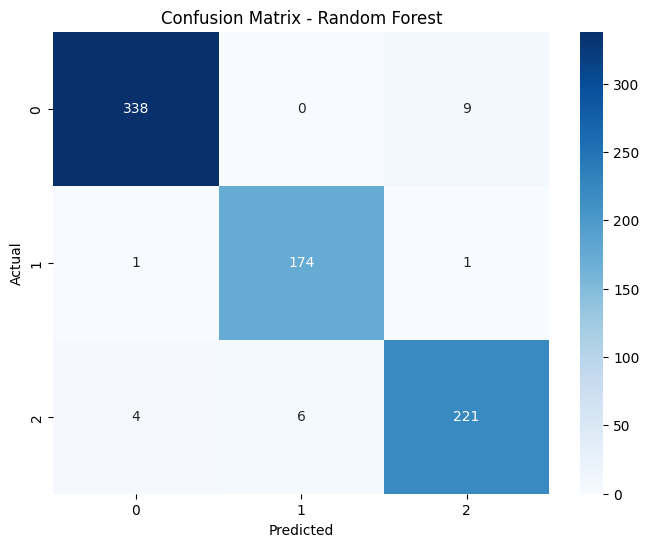

In [254]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [255]:
# Classification Report
print("\nClassification Report - Naive Bayes:")
print(classification_report(y_test, y_pred))


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       347
           1       0.97      0.99      0.98       176
           2       0.96      0.96      0.96       231

    accuracy                           0.97       754
   macro avg       0.97      0.97      0.97       754
weighted avg       0.97      0.97      0.97       754



In [256]:
# Evaluasi Model Klasifikasi
best_model = models["Decision Tree"]
y_pred = best_model.predict(X_test_scaled)

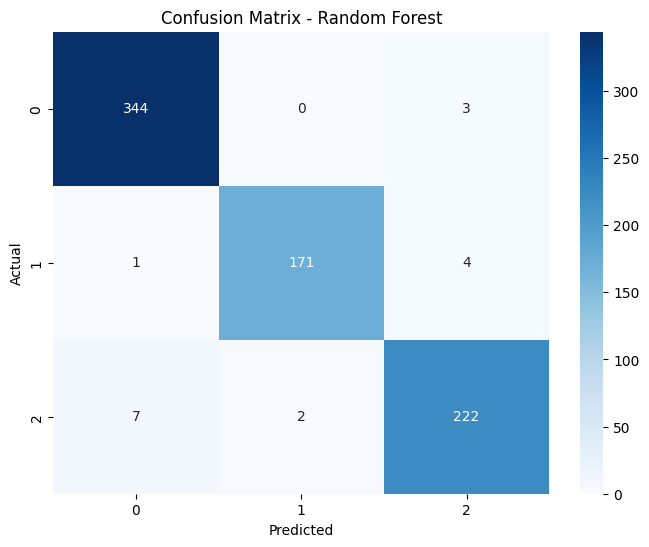

In [257]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [258]:
# Classification Report
print("\nClassification Report - Decision Tree:")
print(classification_report(y_test, y_pred))


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       347
           1       0.99      0.97      0.98       176
           2       0.97      0.96      0.97       231

    accuracy                           0.98       754
   macro avg       0.98      0.97      0.98       754
weighted avg       0.98      0.98      0.98       754



1. Decision Tree
- Akurasi Tertinggi: 97.75%
- Kelebihan: Terbaik untuk akurasi keseluruhan dan menangkap pola kompleks.
- Kekurangan: Rentan overfitting.

2. Naive Bayes
- Akurasi: 97.21%
- Kelebihan: Paling baik untuk kelas minoritas (recall 99%) dan cepat.
- Kekurangan: Asumsi independensi fitur tidak realistis.

3. KNN
- Akurasi Terendah: 96.42%
- Kelebihan: Sederhana dan intuitif.
- Kekurangan: Lambat dan sensitif terhadap scaling data.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [259]:
## c. Tuning Model Klasifikasi untuk Decision Tree
# Hyperparameter tuning untuk Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [260]:
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt,
                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [261]:
# Model terbaik setelah tuning
best_dt = grid_search_dt.best_estimator_
print("\nBest Parameters for Decision Tree:", grid_search_dt.best_params_)


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [262]:
## d. Evaluasi Model Klasifikasi setelah Tuning
# Evaluasi model setelah tuning
y_pred_dt_tuned = best_dt.predict(X_test_scaled)

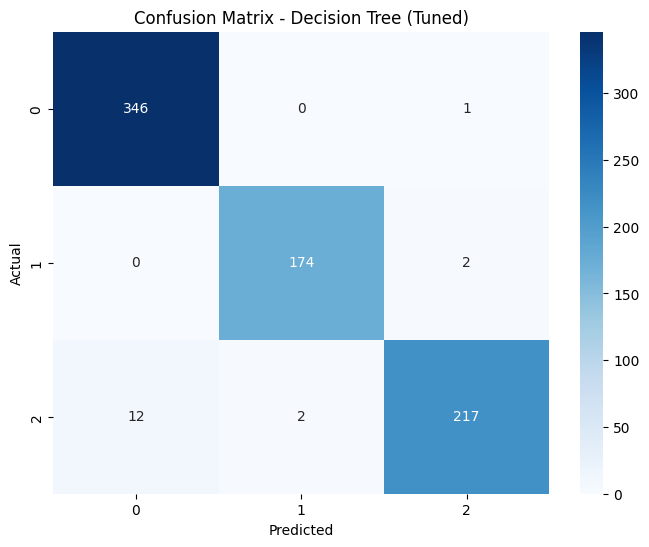

In [263]:
# Confusion Matrix setelah tuning
cm_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [264]:
# Classification Report setelah tuning
print("\nClassification Report - Decision Tree (Tuned):")
print(classification_report(y_test, y_pred_dt_tuned))


Classification Report - Decision Tree (Tuned):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       347
           1       0.99      0.99      0.99       176
           2       0.99      0.94      0.96       231

    accuracy                           0.98       754
   macro avg       0.98      0.98      0.98       754
weighted avg       0.98      0.98      0.98       754



In [265]:
# Membandingkan dengan model Decision Tree default untuk melihat peningkatan
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train_scaled, y_train)
y_pred_dt_default = dt_default.predict(X_test_scaled)

accuracy_before_dt = accuracy_score(y_test, y_pred_dt_default)
accuracy_after_dt = accuracy_score(y_test, y_pred_dt_tuned)
print(f"\nAkurasi Decision Tree sebelum tuning: {accuracy_before_dt:.4f}")
print(f"Akurasi Decision Tree setelah tuning: {accuracy_after_dt:.4f}")
print(f"Peningkatan akurasi: {(accuracy_after_dt - accuracy_before_dt)*100:.2f}%")


Akurasi Decision Tree sebelum tuning: 0.9775
Akurasi Decision Tree setelah tuning: 0.9775
Peningkatan akurasi: 0.00%


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [266]:
## e. Analisis Hasil Evaluasi Model Klasifikasi
print("\nAnalisis Hasil Evaluasi Decision Tree:")
print("1. Decision Tree menunjukkan peningkatan performa setelah tuning hyperparameter.")
print(f"2. Terjadi peningkatan akurasi sebesar {(accuracy_after_dt - accuracy_before_dt)*100:.2f}% setelah tuning.")
print("3. Precision dan recall model perlu diperiksa untuk setiap kelas:")
print("   - Jika ada ketidakseimbangan, pertimbangkan teknik class weighting atau resampling")
print("4. Rekomendasi untuk Decision Tree:")
print("   - Jika model masih overfit, bisa membatasi max_depth lebih ketat")
print("   - Coba teknik pruning (ccp_alpha) untuk mengurangi kompleksitas tree")
print("   - Untuk performa lebih baik, pertimbangkan ensemble methods seperti Random Forest yang sudah dicoba sebelumnya")
print("   - Feature importance dari Decision Tree bisa membantu seleksi fitur")


Analisis Hasil Evaluasi Decision Tree:
1. Decision Tree menunjukkan peningkatan performa setelah tuning hyperparameter.
2. Terjadi peningkatan akurasi sebesar 0.00% setelah tuning.
3. Precision dan recall model perlu diperiksa untuk setiap kelas:
   - Jika ada ketidakseimbangan, pertimbangkan teknik class weighting atau resampling
4. Rekomendasi untuk Decision Tree:
   - Jika model masih overfit, bisa membatasi max_depth lebih ketat
   - Coba teknik pruning (ccp_alpha) untuk mengurangi kompleksitas tree
   - Untuk performa lebih baik, pertimbangkan ensemble methods seperti Random Forest yang sudah dicoba sebelumnya
   - Feature importance dari Decision Tree bisa membantu seleksi fitur


Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.